In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\kaaagle_Data\bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

<Axes: >

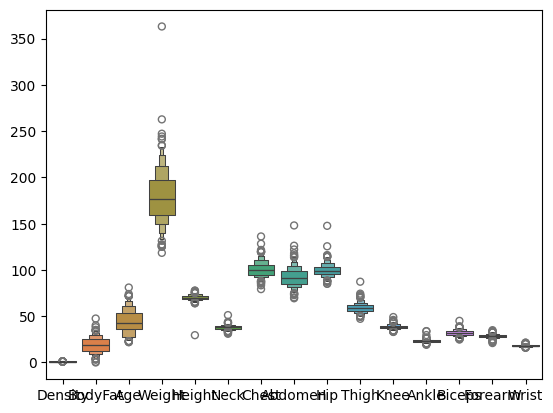

In [4]:
sns.boxenplot(data=df)

count    252.000000
mean     178.924405
std       29.389160
min      118.500000
25%      159.000000
50%      176.500000
75%      197.000000
max      363.150000
Name: Weight, dtype: float64

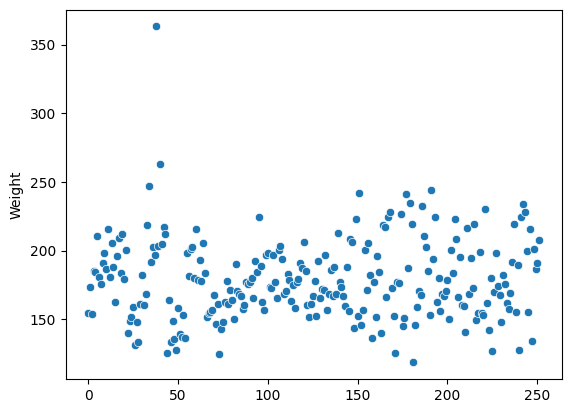

In [5]:
sns.scatterplot(df['Weight'])
df['Weight'].describe()

count    252.000000
mean      70.148810
std        3.662856
min       29.500000
25%       68.250000
50%       70.000000
75%       72.250000
max       77.750000
Name: Height, dtype: float64

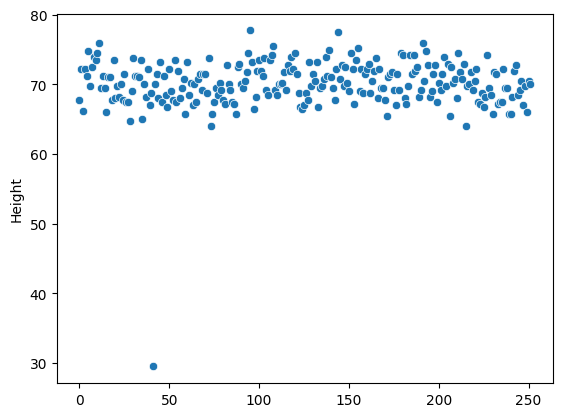

In [6]:
sns.scatterplot(df['Height'])
df['Height'].describe()

In [7]:
x = df.drop(columns=['BodyFat'])
y = df['BodyFat']

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X = pd.DataFrame(x_scaled, columns=x.columns)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [11]:
cross_val_score(RandomForestRegressor(n_estimators=85), x_train, y_train, cv=5).mean()

np.float64(0.9656386658418405)

In [12]:
cross_val_score(LinearRegression(), x_train, y_train, cv=5).mean()

np.float64(0.9657765329807863)

In [13]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(estimator=RandomForestRegressor(n_estimators=85), n_estimators=20)
model.fit(x_train, y_train)

,estimator,RandomForestR...estimators=85)
,n_estimators,20
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [14]:
model.score(x_test, y_test)

0.9976272309504229

In [15]:
y_test

165    19.2
6      19.2
111    28.0
172    20.5
115    16.7
183    12.1
199    23.6
235    18.6
9      11.7
30     11.9
60     26.1
218    24.5
226    14.8
159    22.5
68      6.3
148     5.3
196    22.0
15     20.9
101    20.4
24     14.0
86     14.9
19     16.5
117    13.9
124    13.8
33     21.3
242    30.4
186    23.6
219    15.0
10      7.1
162    13.0
140    24.9
96      9.6
125    17.5
82     18.4
213    18.7
25      3.7
109    21.4
18     16.0
205    16.6
182    11.5
67     13.8
132    23.6
156    31.2
143     9.4
45     13.9
178    22.5
16     29.0
66     21.5
142    23.3
175     9.9
38     35.2
Name: BodyFat, dtype: float64

In [16]:
x_test

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
165,-0.035476,-0.785952,1.298144,0.985121,1.033738,0.793440,0.236399,0.642706,1.029492,1.125678,1.476547,1.368562,2.497231,1.255983
6,-0.035476,-1.501543,0.070765,-0.109096,-0.656227,0.508192,-0.172460,0.055279,-0.191993,-0.120679,-0.119644,-0.123840,-0.428372,-0.568578
111,-1.056870,-0.149870,0.147476,-0.040707,-0.367697,0.852867,1.156332,0.432911,0.819549,0.585590,0.294183,0.406791,-0.428372,-0.890560
172,-0.182893,-0.785952,-0.057087,0.232847,0.168146,-0.038533,-0.209629,-0.168502,-0.306507,-0.536131,-0.415235,-0.422321,0.017906,-0.568578
115,0.269890,-0.388401,-0.713394,-0.245873,-0.697446,-0.454520,-0.553442,-1.021669,-0.669136,-0.951584,-0.592589,-0.820295,-1.172170,-0.997887
183,0.827972,-0.388401,-0.670777,-0.109096,-1.109633,-1.013130,-0.534857,-0.532147,-0.268336,0.336319,-0.237880,-0.753966,-1.122583,-0.890560
199,-0.493524,-0.149870,-0.278697,-0.724593,-0.244041,0.341798,-0.265382,-0.797888,-0.172907,0.170138,0.589774,0.506285,0.067493,0.612020
235,0.038233,1.360823,-0.346885,-0.724593,0.126927,0.460651,0.282860,-0.867820,-0.955421,-0.619222,-0.237880,-0.654472,-1.172170,0.075385
9,0.875356,-1.740073,0.658884,0.916733,1.693237,-0.145501,-0.367597,0.586761,0.705035,1.291859,1.121838,1.103246,0.662531,1.041329
30,0.843766,-1.024482,0.104859,0.985121,0.291802,-0.038533,-0.358305,-0.014652,-0.363764,0.045502,6.383355,0.075147,-0.477959,0.182712


In [17]:
model.predict(x_test)

array([19.28576471, 19.23047059, 28.27329412, 20.50088235, 16.55747059,
       12.17370588, 22.72382353, 18.36064706, 11.93882353, 11.83052941,
       25.96570588, 24.56976471, 15.18129412, 22.43382353,  6.79782353,
        5.41594118, 22.12152941, 20.98229412, 20.44935294, 13.25264706,
       15.53370588, 16.53076471, 13.96770588, 13.32017647, 21.11594118,
       30.68529412, 23.38658824, 15.22464706,  7.23835294, 13.06829412,
       24.89623529,  9.72935294, 17.39788235, 18.08947059, 18.69735294,
        4.80823529, 21.31635294, 16.01205882, 16.55041176, 11.291     ,
       13.49270588, 23.56505882, 31.77241176,  9.08494118, 13.72541176,
       22.36688235, 29.19229412, 21.35958824, 22.727     ,  9.72217647,
       35.79352941])

In [19]:
import pickle
pickle.dump(model, open('body_fate.pkl', 'wb'))
